In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [44]:
start_url = "https://www.imerisia.gr/news"

In [45]:
response = requests.get(start_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [46]:
len(doc.find('div', {'class': 'square-teasers'}).find_all('article'))

20

In [48]:
doc.find('div', {'class': 'square-teasers'}).find_all('article')[0]

<article class="square-teaser">
<a data-tb-region-item="" href="/politiki/73754_tsapanidoy-alazoniki-apopoiisi-eythynon-apo-ti-nd-gia-tin-trapeza-thematon">
<div class="default-cat-date">
<span>ΠΟΛΙΤΙΚΗ</span>
<time class="default-date" datetime="2023-05-30T14:57:18+03:00">30.05.23 <span>14:57</span></time>
</div>
<h4>
Τσαπανίδου: Αλαζονική αποποίηση ευθυνών από τη ΝΔ για την Τράπεζα Θεμάτων
</h4>
<figure>
<img alt="" class="media__image media__element b-lazy" data-src="/sites/default/files/styles/square_medium/public/2023-01/tsapanidou-1.jpg?itok=d_8CK_bp" height="114" loading="lazy" src="data:image/svg+xml;charset=utf-8,%3Csvg xmlns%3D'http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg' viewBox%3D'0 0 114 114'%2F%3E" typeof="foaf:Image" width="114"/>
</figure>
<div class="default-summary">«Πάντα φταίνε οι άλλοι. Στο μεταξύ η αγωνία των μαθητών συνεχίζεται, όσο το πρόβλημα στις εξετάσεις...</div>
</a>
</article>

In [52]:
# Ορίζουμε το αρχικό url του site
main_url = 'https://www.imerisia.gr/'
# Ορίζουμε το βασικό url για τις σελίδες που θέλουμε
start_url = 'https://www.imerisia.gr/news?_wrapper_format=html&page='
# Φτιάχνουμε μια κενή λίστα για να αποθηκεύουμε τα λεξικά που θα φτιάχνουμε για κάθε άρθρο
stories_list = []

# φτιάχνουμε τη λούπα που ο scraper θα μπαίνει σε καθε μια από τις σελίδες για να φέρνει τα άρθρα
for page_num in range(0, 3):
  url = start_url + str(page_num)
  response = requests.get(url)
  doc = BeautifulSoup(response.text, 'html.parser')
  stories = doc.find('div', {'class': 'square-teasers'}).find_all('article')
  for story in stories:
      # Φτιάχνουμε ένα λεξικό χωρίς τίποτα
      story_dict = {}
      # link
      try:
        link = story.find('a')['href'] 
        # ελέγχουμε αν το link ξεκινάει από "http"
        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      # title
      try:
        title = story.find('h4').text
        story_dict['title'] = title
      except:
        story_dict['title'] = ''
        pass
      # time
      try:
        time = story.find('time').text
        story_dict['time'] = time
      except:
        story_dict['time'] = ''
        pass
      # section
      try:
        section = story.find('h1', {'class': 'title-area'}).text
        story_dict['section'] = section
      except:
        story_dict['section'] = ''
        pass
      # summary
      try:
        summary = story.find('div', {'class': 'default-summary'}).text
        story_dict['summary'] = summary
      except:
        story_dict['summary'] = ''
        pass
      # Προσθέτουμε το λεξικό στη λίστα 
      stories_list.append(story_dict)
    
# Δημιουργούμε dataframe από τη λίστα με τα dictionaries
hmerhsia_df = pd.DataFrame(stories_list)

In [53]:
hmerhsia_df

url  \
0   https://www.imerisia.gr//politiki/73754_tsapan...   
1   https://www.imerisia.gr//politiki/73753_eyroko...   
2   https://www.imerisia.gr//politiki/73752_androy...   
3   https://www.imerisia.gr//epiheiriseis/73751_om...   
4   https://www.imerisia.gr//toyrismos/73745_koino...   
5   https://www.imerisia.gr//tehnologia/73750_j-hu...   
6   https://www.imerisia.gr//ergasia/73749_dypa-xe...   
7   https://www.imerisia.gr//oikonomia/trapezes/73...   
8   https://www.imerisia.gr//kosmos/73747_bugatti-...   
9   https://www.imerisia.gr//politiki/73746_tempon...   
10  https://www.imerisia.gr//epiheiriseis/energeia...   
11  https://www.imerisia.gr//epiheiriseis/73744_bo...   
12  https://www.imerisia.gr//athlitismos/73742_pan...   
13  https://www.imerisia.gr//toyrismos/73741_epese...   
14  https://www.imerisia.gr//kosmos/diethnis-oikon...   
15  https://www.imerisia.gr//kosmos/73739_dania-sh...   
16  https://www.imerisia.gr//ergasia/73738_pno-zit...   
17  https://www.imerisia.gr//politiki/73737_taz-ps...   
18  https://www.imerisia.gr//koinonia/73736_eisagg...   
19  https://www.imerisia.gr//koinonia/73678_airbnb...   
20  https://www.imerisia.gr//kosmos/73735_ispania-...   
21  https://www.imerisia.gr//agores/73734_hrimatis...   
22  https://www.imerisia.gr//epiheiriseis/73733_in...   
23  https://www.imerisia.gr//politiki/73732_kke-ep...   
24  https://www.imerisia.gr//ergasia/73731_dypa-te...   
25  https://www.imerisia.gr//epiheiriseis/73730_ep...   
26  https://www.imerisia.gr//toyrismos/73729_koino...   
27  https://www.imerisia.gr//politiki/73728_tsipra...   
28  https://www.imerisia.gr//epiheiriseis/73727_pl...   
29  https://www.imerisia.gr//koinonia/73726_apolei...   
30  https://www.imerisia.gr//kosmos/diethnis-oikon...   
31  https://www.imerisia.gr//oikonomia/73724_soype...   
32  https://www.imerisia.gr//oikonomia/73723_efka-...   
33  https://www.imerisia.gr//koinonia/73722_katerr...   
34  https://www.imerisia.gr//kosmos/diethnis-oikon...   
35  https://www.imerisia.gr//kosmos/73719_kina-i-k...   
36  https://www.imerisia.gr//media/73718_ape-mpe-e...   
37  https://www.imerisia.gr//oikonomia/73708_forol...   
38  https://www.imerisia.gr//koinonia/73717_tesser...   
39  https://www.imerisia.gr//epiheiriseis/energeia...   
40  https://www.imerisia.gr//politiki/73631_ekloge...   
41  https://www.imerisia.gr//politiki/73716_ekloge...   
42  https://www.imerisia.gr//oikonomia/trapezes/73...   
43  https://www.imerisia.gr//politiki/73715_ekloge...   
44  https://www.imerisia.gr//epiheiriseis/73705_ef...   
45  https://www.imerisia.gr//kosmos/73714_o-solts-...   
46  https://www.imerisia.gr//agores/hrimatistirio/...   
47  https://www.imerisia.gr//koinonia/73711_kairos...   
48  https://www.imerisia.gr//ergasia/73700_koinoni...   
49  https://www.imerisia.gr//kosmos/73713_brazilia...   
50  https://www.imerisia.gr//koinonia/73712_thessa...   
51  https://www.imerisia.gr//kosmos/73710_ipa-toyr...   
52  https://www.imerisia.gr//agores/hrimatistirio/...   
53  https://www.imerisia.gr//epiheiriseis/energeia...   
54  https://www.imerisia.gr//epiheiriseis/73702_oi...   
55  https://www.imerisia.gr//politiki/73701_k-mits...   
56  https://www.imerisia.gr//oikonomia/73699_energ...   
57  https://www.imerisia.gr//kosmos/73698_kiebo-yi...   
58  https://www.imerisia.gr//politiki/73697_al-tsi...   
59  https://www.imerisia.gr//oikonomia/trapezes/73...   

                                                title            time section  \
0   \nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από ...  30.05.23 14:57           
1   \nΕυρωκοινοβούλιο: «Ναι» στην άρση ασυλίας του...  30.05.23 14:44           
2   \nΑνδρουλάκης: Το επιτελικό κράτος αποδείχθηκε...  30.05.23 14:19           
3   \nΟμιλος Αβαξ: Σύμβαση 673,5 εκατ. ευρώ για κα...  30.05.23 14:09           
4   \nΚοινωνικός Τουρισμός: Πού φτάνει η επιδότηση...  30.05.23 13:55           
5   \nJ. Huang (CEO Nvidia): Ο καθένας πλέον μπορε...  30.05.23 13:50           
6   \

In [54]:
import numpy as np 

In [55]:
hmerhsia_df.head(1)

url  \
0  https://www.imerisia.gr//politiki/73754_tsapan...   

                                               title            time section  \
0  \nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από ...  30.05.23 14:57           

                                             summary  
0  «Πάντα φταίνε οι άλλοι. Στο μεταξύ η αγωνία τω...

In [58]:
hmerhsia_df['text'] = hmerhsia_df[['title', 'summary']].agg('.'.join, axis=1)
hmerhsia_df.loc[0, 'text']

'\nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από τη ΝΔ για την Τράπεζα Θεμάτων\n.«Πάντα φταίνε οι άλλοι. Στο μεταξύ η αγωνία των μαθητών συνεχίζεται, όσο το πρόβλημα στις εξετάσεις...'

In [59]:
hmerhsia_df.dtypes

url        object
title      object
time       object
section    object
summary    object
text       object
dtype: object

In [60]:
hmerhsia_df.loc[0, 'time']

'30.05.23 14:57'

In [67]:
hmerhsia_df['date'] = pd.to_datetime(hmerhsia_df['time'], format='%d.%m.%y %H:%M')

In [68]:
hmerhsia_df.dtypes

url                object
title              object
time               object
section            object
summary            object
text               object
date       datetime64[ns]
dtype: object

In [70]:
hmerhsia_df.head(1)

url  \
0  https://www.imerisia.gr//politiki/73754_tsapan...   

                                               title            time section  \
0  \nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από ...  30.05.23 14:57           

                                             summary  \
0  «Πάντα φταίνε οι άλλοι. Στο μεταξύ η αγωνία τω...   

                                                text                date  
0  \nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από ... 2023-05-30 14:57:00

In [71]:
short_hmerhsia_df = hmerhsia_df[['date','text' ]]

In [72]:
short_hmerhsia_df.head()

date                                               text
0 2023-05-30 14:57:00  \nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από ...
1 2023-05-30 14:44:00  \nΕυρωκοινοβούλιο: «Ναι» στην άρση ασυλίας του...
2 2023-05-30 14:19:00  \nΑνδρουλάκης: Το επιτελικό κράτος αποδείχθηκε...
3 2023-05-30 14:09:00  \nΟμιλος Αβαξ: Σύμβαση 673,5 εκατ. ευρώ για κα...
4 2023-05-30 13:55:00  \nΚοινωνικός Τουρισμός: Πού φτάνει η επιδότηση...

In [73]:
short_hmerhsia_df.tail()

date                                               text
55 2023-05-29 20:24:00  \nΚ. Μητσοτάκης: Θέλουμε ακόμη μεγαλύτερη νίκη...
56 2023-05-29 20:00:00  \nΕνέργεια: Μικρή άνοδος στις τιμές των καυσίμ...
57 2023-05-29 19:25:00  \nΤο Κίεβο υιοθετεί κυρώσεις κατά της Τεχεράνη...
58 2023-05-29 18:50:00  \nΑλ. Τσίπρας: Κινητοποιούμε κάθε δυνατότητα γ...
59 2023-05-29 18:33:00  \nΧρ. Μεγάλου (Τρ. Πειραιώς): Ισχυρές οι προοπ...

In [74]:
short_hmerhsia_df['year'] = pd.DatetimeIndex(short_hmerhsia_df['date']).year
short_hmerhsia_df['month'] = pd.DatetimeIndex(short_hmerhsia_df['date']).month
short_hmerhsia_df['day'] = pd.DatetimeIndex(short_hmerhsia_df['date']).day
short_hmerhsia_df['hour'] = pd.DatetimeIndex(short_hmerhsia_df['date']).hour


<ipython-input-74-c86a29255917>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_hmerhsia_df['year'] = pd.DatetimeIndex(short_hmerhsia_df['date']).year
<ipython-input-74-c86a29255917>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_hmerhsia_df['month'] = pd.DatetimeIndex(short_hmerhsia_df['date']).month
<ipython-input-74-c86a29255917>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [75]:
short_hmerhsia_df.head()

date                                               text  \
0 2023-05-30 14:57:00  \nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από ...   
1 2023-05-30 14:44:00  \nΕυρωκοινοβούλιο: «Ναι» στην άρση ασυλίας του...   
2 2023-05-30 14:19:00  \nΑνδρουλάκης: Το επιτελικό κράτος αποδείχθηκε...   
3 2023-05-30 14:09:00  \nΟμιλος Αβαξ: Σύμβαση 673,5 εκατ. ευρώ για κα...   
4 2023-05-30 13:55:00  \nΚοινωνικός Τουρισμός: Πού φτάνει η επιδότηση...   

   year  month  day  hour  
0  2023      5   30    14  
1  2023      5   30    14  
2  2023      5   30    14  
3  2023      5   30    14  
4  2023      5   30    13

<Axes: >

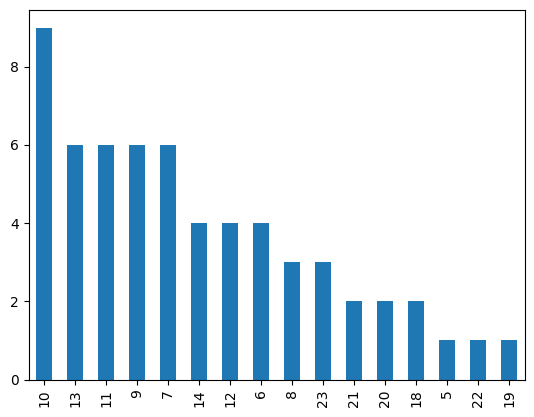

In [78]:
short_hmerhsia_df['hour'].value_counts().plot(kind='bar')

In [79]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [80]:
short_hmerhsia_df[short_hmerhsia_df['day']==24]['text']

Series([], Name: text, dtype: object)

In [81]:
text = short_hmerhsia_df[(short_hmerhsia_df['day'] > 29) & (short_hmerhsia_df['day'] < 31) ]['text'].str.cat(sep = ' ') 

In [82]:
text

"\nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από τη ΝΔ για την Τράπεζα Θεμάτων\n.«Πάντα φταίνε οι άλλοι. Στο μεταξύ η αγωνία των μαθητών συνεχίζεται, όσο το πρόβλημα στις εξετάσεις... \nΕυρωκοινοβούλιο: «Ναι» στην άρση ασυλίας του Αλ. Γεωργούλη\n.Η ολομέλεια αναμένεται να ψηφίσει την 1η Ιουνίου \nΑνδρουλάκης: Το επιτελικό κράτος αποδείχθηκε για άλλη μια φορά επιτελικό χάος\n.Ο πρόεδρος του ΠΑΣΟΚ-ΚΙΝΑΛ τόνισε ότι «παίζουν με την αγωνία των μαθητών, προσπαθώντας να ρίξουν... \nΟμιλος Αβαξ: Σύμβαση 673,5 εκατ. ευρώ για κατασκευή ενεργειακής μονάδας στη Ρουμανία\n.Η κατασκευή θα διαρκέσει 38 μήνες και αναμένεται να ξεκινήσει άμεσα, δημιουργώντας περίπου 700... \nΚοινωνικός Τουρισμός: Πού φτάνει η επιδότηση της ΔΥΠΑ - Τι πληρώνει ο δικαιούχος\n.Εκτός από τη διαμονή σε τουριστικά καταλύματα, επιδοτούνται και ακτοπλοϊκά εισιτήρια \nJ. Huang (CEO Nvidia): Ο καθένας πλέον μπορεί να γίνει προγραμματιστής με την ΑΙ\n.O Huang, που έγινε δεκτός ως ροκ σταρ σε συνέδριο στην Ταϊβάν, έδειξε τι μπορεί να

In [85]:
import spacy

In [86]:
#!python -m spacy download el_core_news_sm

2023-05-30 12:26:14.850667: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 71.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [87]:
nlp = spacy.load('el_core_news_sm') 

In [88]:
list(nlp.Defaults.stop_words)[0:20]

['ποιοί',
 'ταύτα',
 'κάμποσα',
 'όπως',
 'οποίες',
 'τέτοιους',
 'επίσης',
 'ορισμένως',
 'παρά',
 'τουλάχιστο',
 'διαρκώς',
 'εμάς',
 'ι',
 'πού',
 'τους',
 'ενώ',
 'πάντως',
 'πώς',
 'όποιος',
 'εν']

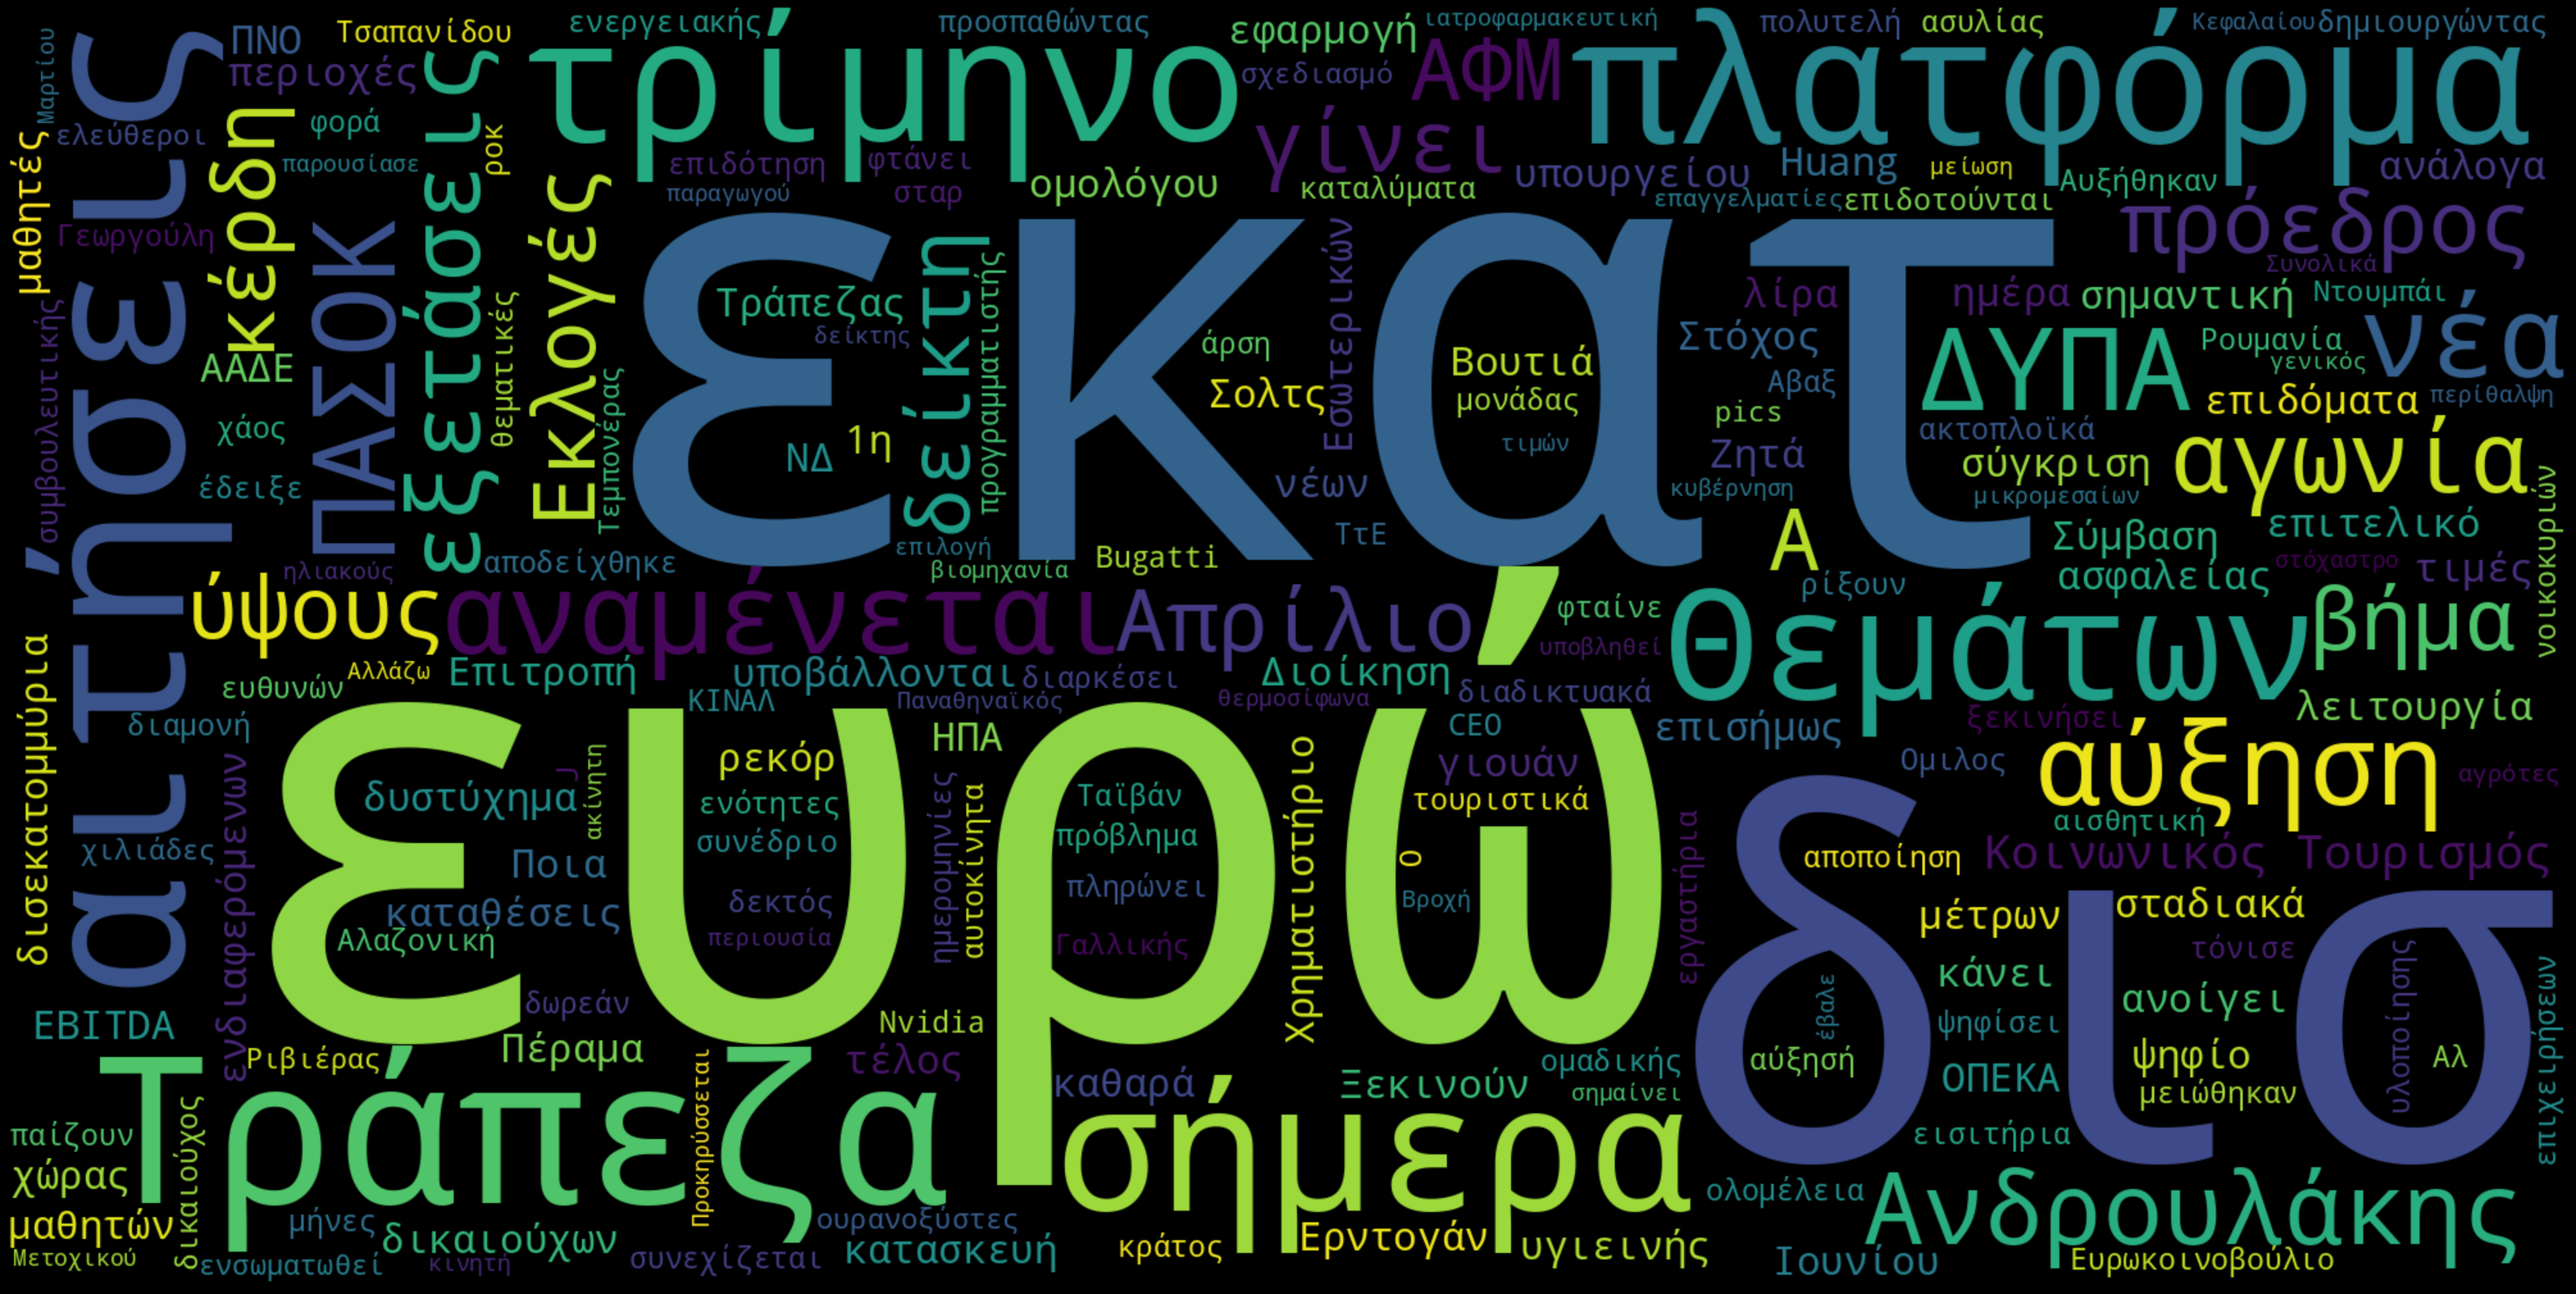

In [89]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words, #έχω προσθέσει και τα stopwords για τα ελληνικά
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [91]:
doc = nlp(short_hmerhsia_df['text'][1])

In [92]:
for token in doc: 
    print(token, token.lemma_)


 

Ευρωκοινοβούλιο ευρωκοινοβούλιο
: :
« «
Ναι Ναι
» »
στην σε ο
άρση άρση
ασυλίας ασυλία
του ο
Αλ. Αλ.
Γεωργούλη Γεωργούλη

 

.Η .Η
ολομέλεια ολομέλεια
αναμένεται αναμένω
να να
ψηφίσει ψηφίζω
την ο
1η 1ος
Ιουνίου Ιούνιος


In [93]:
' '.join(token.lemma_ for token in doc)

'\n ευρωκοινοβούλιο : « Ναι » σε ο άρση ασυλία ο Αλ. Γεωργούλη \n .Η ολομέλεια αναμένω να ψηφίζω ο 1ος Ιούνιος'

In [94]:
text

"\nΤσαπανίδου: Αλαζονική αποποίηση ευθυνών από τη ΝΔ για την Τράπεζα Θεμάτων\n.«Πάντα φταίνε οι άλλοι. Στο μεταξύ η αγωνία των μαθητών συνεχίζεται, όσο το πρόβλημα στις εξετάσεις... \nΕυρωκοινοβούλιο: «Ναι» στην άρση ασυλίας του Αλ. Γεωργούλη\n.Η ολομέλεια αναμένεται να ψηφίσει την 1η Ιουνίου \nΑνδρουλάκης: Το επιτελικό κράτος αποδείχθηκε για άλλη μια φορά επιτελικό χάος\n.Ο πρόεδρος του ΠΑΣΟΚ-ΚΙΝΑΛ τόνισε ότι «παίζουν με την αγωνία των μαθητών, προσπαθώντας να ρίξουν... \nΟμιλος Αβαξ: Σύμβαση 673,5 εκατ. ευρώ για κατασκευή ενεργειακής μονάδας στη Ρουμανία\n.Η κατασκευή θα διαρκέσει 38 μήνες και αναμένεται να ξεκινήσει άμεσα, δημιουργώντας περίπου 700... \nΚοινωνικός Τουρισμός: Πού φτάνει η επιδότηση της ΔΥΠΑ - Τι πληρώνει ο δικαιούχος\n.Εκτός από τη διαμονή σε τουριστικά καταλύματα, επιδοτούνται και ακτοπλοϊκά εισιτήρια \nJ. Huang (CEO Nvidia): Ο καθένας πλέον μπορεί να γίνει προγραμματιστής με την ΑΙ\n.O Huang, που έγινε δεκτός ως ροκ σταρ σε συνέδριο στην Ταϊβάν, έδειξε τι μπορεί να

In [95]:
full_doc = nlp(text) 

In [96]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [97]:
clear_text[200:400]

'» σε ο άρση ασυλία ο Αλ. Γεωργούλη \n .Η ολομέλεια αναμένω να ψηφίζω ο 1ος Ιούνιος \n Ανδρουλάκης : ο επιτελικός κράτος αποδείχθηκε για άλλος ένας φορά επιτελικός χάος \n .Ο πρόεδρος ο ΠΑΣΟΚ-ΚΙΝΑΛ τονίζω'

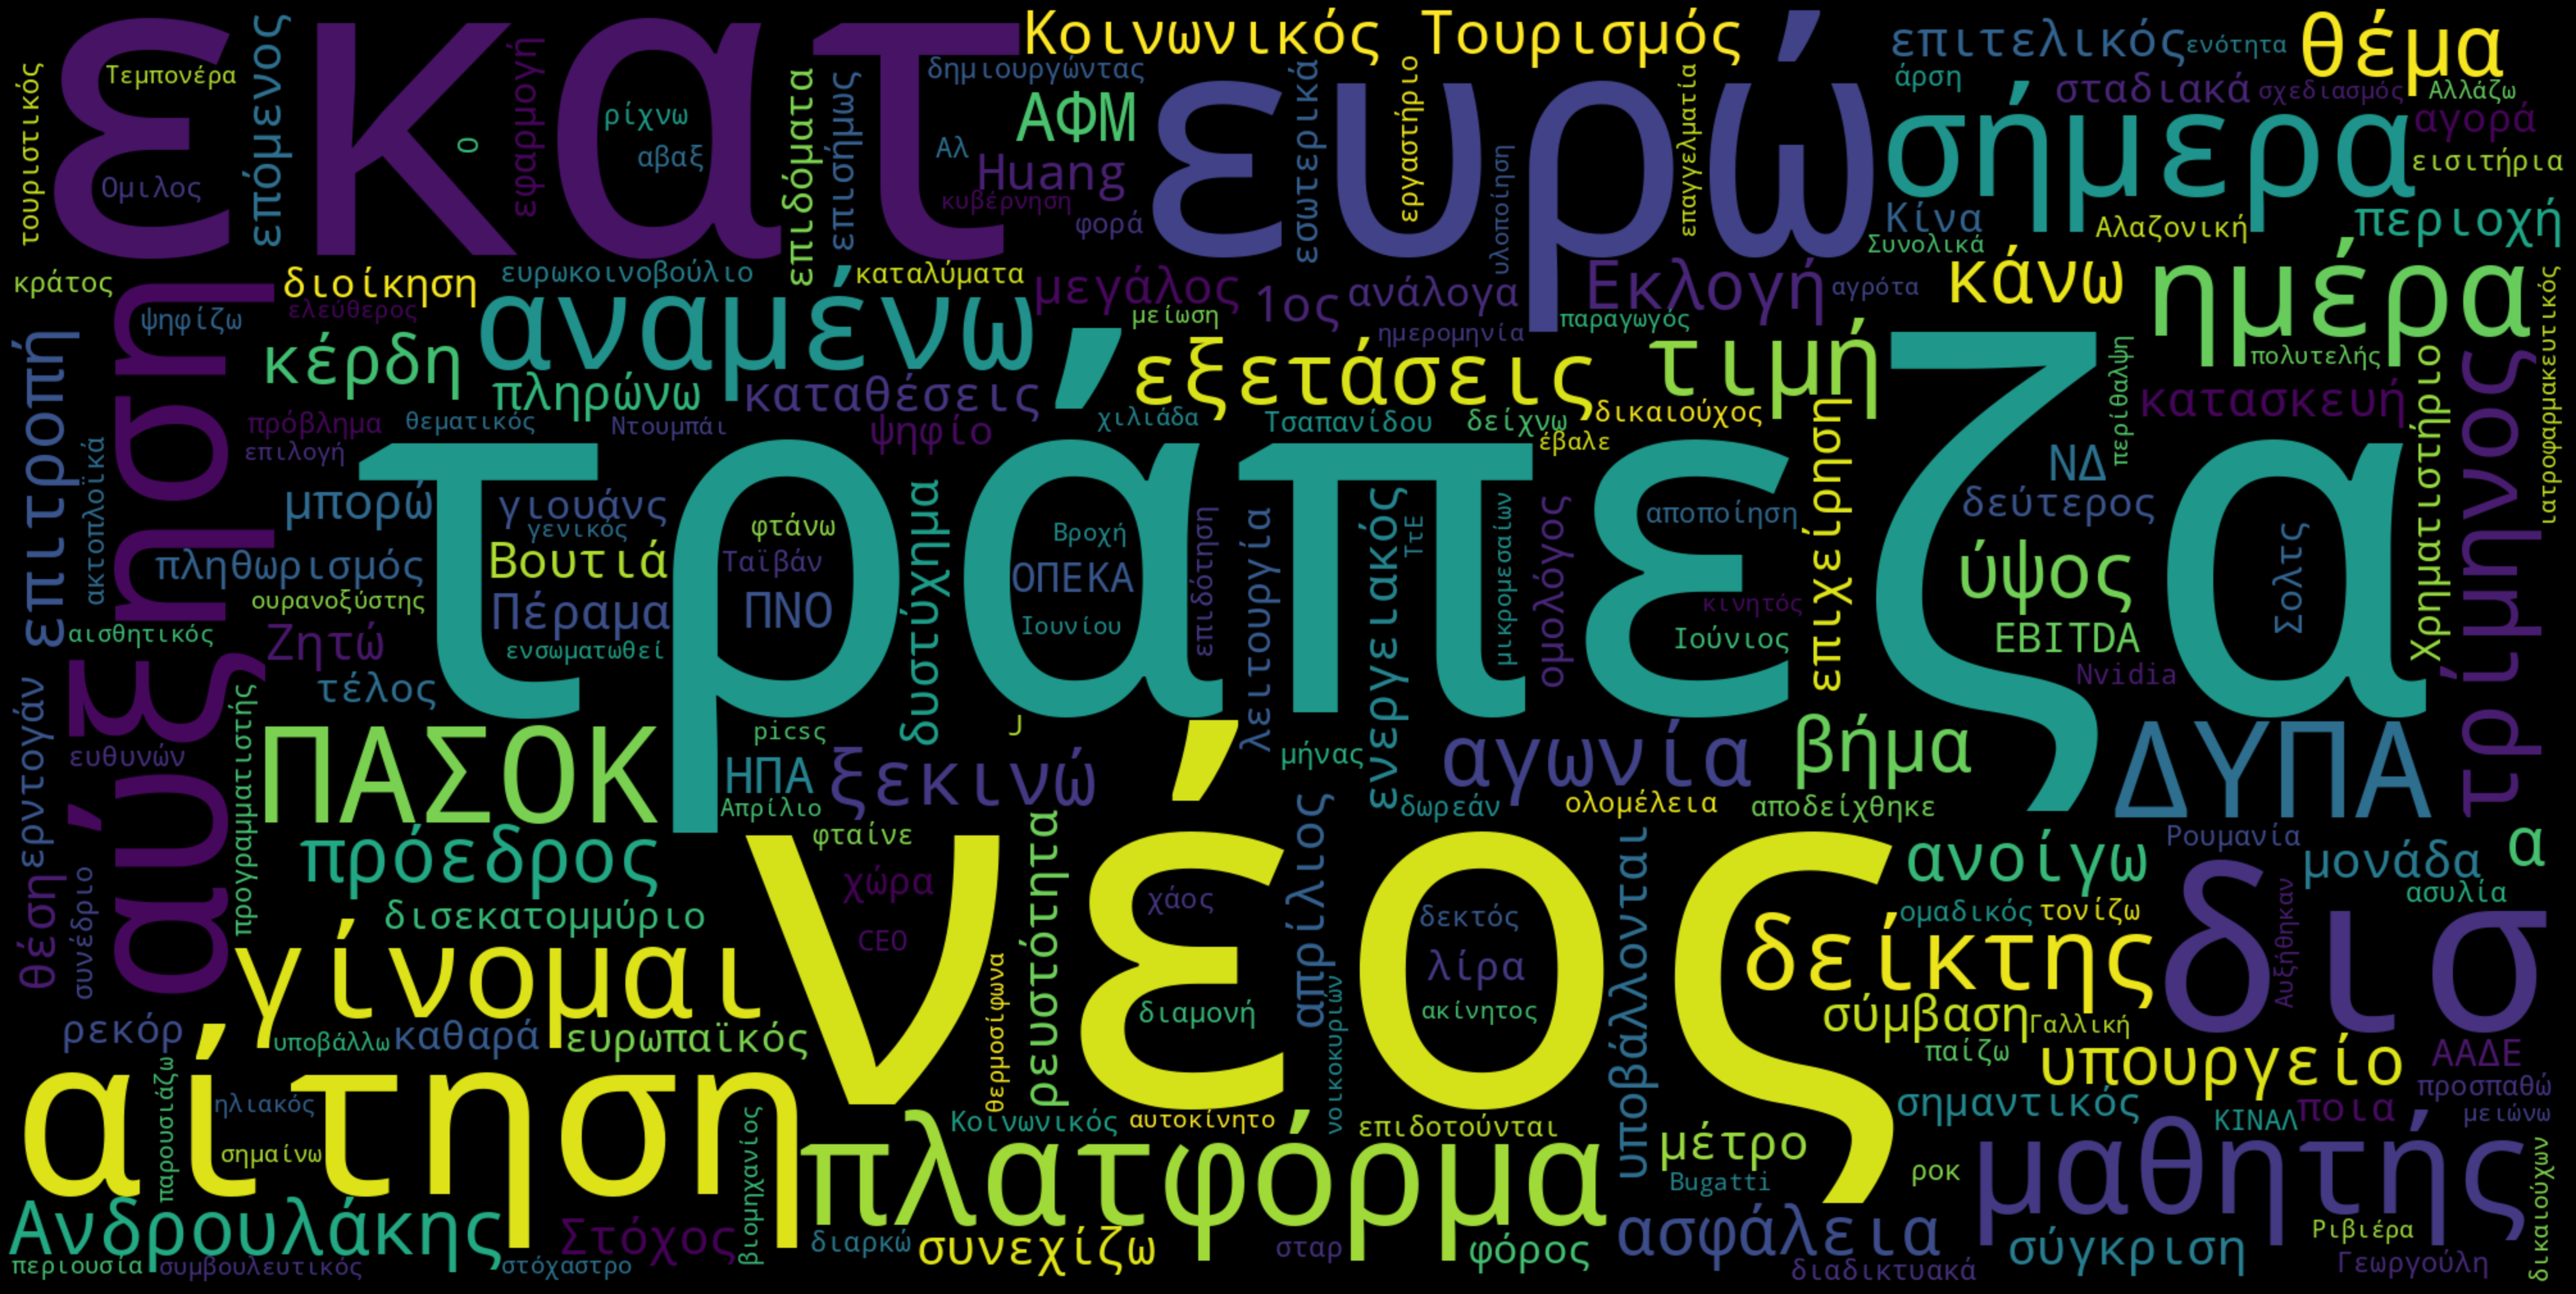

In [99]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Το συννεφόλεξο, μας βοηθά να κατανοήσουμε πολλά πράγματα για το περιεχόμενο και τη θεματολογία των άρθρων της σημερινής ημέρας, από την ειδησεογραφική εφημερίδα «ΗΜΕΡΗΣΙΑ». Πιο συγκεκριμένα, τα θέματα που απασχολούν τους αναγνώστες αφορούν τη πολιτική, και ειδικότερα τις εκλογές, την οικονομία, τη παιδεία και μάλιστα τις πανελλαδικές εξετάσεις, τον τουρισμό, αλλά και διάφορα θέματα της εξωτερικής πολιτικής και του κόσμου γενικότερα. 